In [2]:
!pip install --upgrade pip
!pip install geopandas
!pip install descartes

import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import shapely
import shapely.wkt
from shapely.geometry import Point

Requirement already up-to-date: pip in /anaconda3/lib/python3.6/site-packages (18.0)


In [32]:
data_properatti = pd.read_csv("properatti.csv")

d = {'state_name': data_properatti['state_name'],
     'lat': data_properatti['lat'], 
     'lon': data_properatti['lon'], 
     'price': data_properatti['price_aprox_usd'] }

newdf = pd.DataFrame(d)
df_caba = newdf[newdf['state_name'] == "Capital Federal"] # Filtramos solo con Capital Federal
df_caba = df_caba[df_caba["lon"] > -59] # Sacamos algunos outliers
df_caba = df_caba.reset_index(drop=True) # Reseteamos los index

df_caba.head()

,lat,lon,price,state_name
0,-34.661824,-58.508839,62000.0,Capital Federal
1,-34.652262,-58.522982,72000.0,Capital Federal
2,-34.647797,-58.516424,95000.0,Capital Federal
3,-34.559873,-58.443362,138000.0,Capital Federal
4,-34.559873,-58.443362,195000.0,Capital Federal


In [34]:
crs = {'init': 'epsg:4326'} # Esta es la proyección más común

df_caba['coordinates'] = list(zip(df_caba['lon'], df_caba['lat']))
df_caba['coordinates'] = df_caba['coordinates'].apply(Point)
gdf_caba = geopandas.GeoDataFrame(data=df_caba, geometry="coordinates", crs= crs)

In [35]:
barrios_caba = pd.read_csv('barrios.csv', encoding='latin1')
barrios_caba['coordinates'] = barrios_caba['WKT'].apply(shapely.wkt.loads)
barrios_caba = geopandas.GeoDataFrame(barrios_caba, geometry='coordinates', crs=crs)

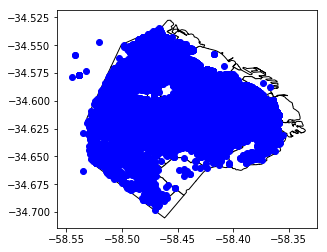

In [36]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
barrios_caba.plot(ax=ax, color='white', edgecolor='black')
gdf_caba.plot(ax=ax, color='blue')
plt.show();

In [8]:
barrios_caba

,WKT,BARRIO,COMUNA,PERIMETRO,AREA,coordinates
0,"POLYGON ((-58.4528200492791 -34.5959886570639,...",CHACARITA,15.0,7725.695228,3.118101e+06,"POLYGON ((-58.4528200492791 -34.5959886570639,..."
1,"POLYGON ((-58.4655768128541 -34.5965577078058,...",PATERNAL,15.0,7087.513295,2.229829e+06,"POLYGON ((-58.4655768128541 -34.5965577078058,..."
2,"POLYGON ((-58.4237529813037 -34.5978273383243,...",VILLA CRESPO,15.0,8132.699348,3.613584e+06,"POLYGON ((-58.4237529813037 -34.5978273383243,..."
3,"POLYGON ((-58.4946097568899 -34.6148652395239,...",VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06,"POLYGON ((-58.4946097568899 -34.6148652395239,..."
4,"POLYGON ((-58.4128700313089 -34.6141162515854,...",ALMAGRO,5.0,8537.901368,4.050752e+06,"POLYGON ((-58.4128700313089 -34.6141162515854,..."
5,"POLYGON ((-58.4306058283309 -34.6070470885963,...",CABALLITO,6.0,10990.964471,6.851029e+06,"POLYGON ((-58.4306058283309 -34.6070470885963,..."
6,"POLYGON ((-58.4819203599833 -34.6242871724757,...",VILLA SANTA RITA,11.0,5757.752335,2.153691e+06,"POLYGON ((-58.4819203599833 -34.6242871724757,..."
7,"POLYGON ((-58.5034920611534 -34.6240324216321,...",MONTE CASTRO,10.0,7361.036418,2.627481e+06,"POLYGON ((-58.5034920611534 -34.6240324216321,..."
8,"POLYGON ((-58.525116079791 -34.613999981063,-5...",VILLA REAL,10.0,5070.965652,1.334146e+06,"POLYGON ((-58.525116079791 -34.613999981063, -..."
9,"POLYGON ((-58.4452515823782 -34.6420397134706,...",FLORES,7.0,15772.425185,8.590784e+06,"POLYGON ((-58.4452515823782 -34.6420397134706,..."


In [31]:
df_caba

,lat,lon,price,state_name,coordinates
0,-34.661824,-58.508839,62000.00,Capital Federal,POINT (-58.5088387 -34.6618237)
1,-34.652262,-58.522982,72000.00,Capital Federal,POINT (-58.5229825 -34.6522615)
2,-34.647797,-58.516424,95000.00,Capital Federal,POINT (-58.5164244 -34.6477969)
3,-34.559873,-58.443362,138000.00,Capital Federal,POINT (-58.443362 -34.5598729)
4,-34.559873,-58.443362,195000.00,Capital Federal,POINT (-58.443362 -34.5598729)
5,-34.652356,-58.501624,239000.00,Capital Federal,POINT (-58.5016239381 -34.6523561177)
6,-34.580504,-58.405874,350000.00,Capital Federal,POINT (-58.4058744847 -34.580503566)
7,-34.590926,-58.411665,270500.00,Capital Federal,POINT (-58.4116653 -34.590926)
8,-34.635118,-58.473964,75000.00,Capital Federal,POINT (-58.4739639408 -34.6351179478)
9,-34.621769,-58.422108,145000.00,Capital Federal,POINT (-58.4221081951 -34.6217693287)


In [39]:
barrios_caba.contains(gdf_caba).value_counts()


False    23768
True         1
dtype: int64

In [ ]:
def obtener_deptos_por_barrio(barrio, gdf):
    return [barrio.contains(gdf)]

In [ ]:
# REGEX PARA LOS METROS CUADRADOS.

# Extraer los m2 y completar faltantes - Santi
import math

def buscar_m2_en_descripcion(descripcion):
    patron_m2 = r"(\d+)\s?(m2|metros2)"
    numero_m2 = re.search(patron_m2, descripcion).group(1)
    if numero_m2 is not None:
        return numero_m2
    else:
        return ''
    
def detectar_metros_cuadrados(x):
        return x
 #   else:
  #      print ('noe')
 #   print (i)

data['surface_total_in_m2'].apply(detectar_metros_cuadrados)